In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

# Todos os estados do brasil

In [2]:
# Lendo a base de dados sobre o turismo em 2019
dados_turismo = pd.read_csv('relatorio_categorizacao_2019-portal.csv', sep=';', thousands=".")
dados_turismo

,MACRO,UF,REGIAO_TURISTICA,MUNICIPIO,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL,ARRECADACAO,CLUSTER
0,Centro-Oeste,MT,Região Turística Portal do Agronegócio,Nova Mutum,5106224,89,14,0,15309,"R$ 708.887,00",C
1,Nordeste,MA,Polo Lagos e Campos Floridos,Cajapió,2102408,0,0,0,1376,R$ -,D
2,Sudeste,MG,Caminhos da Mantiqueira,Brazópolis,3108909,6,3,0,25587,R$ -,D
3,Sudeste,MG,Ouro,Caeté,3110004,310,11,0,23757,"R$ 4.944.942,00",B
4,Sudeste,MG,Pedras Preciosas,Catuji,3115458,0,0,149,0,R$ -,D
...,...,...,...,...,...,...,...,...,...,...,...
2689,Sudeste,MG,Serra do Cabral,Lassance,3138104,0,0,0,0,R$ -,E
2690,Sul,PR,Vale do Ivaí,Bom Sucesso,4103206,0,0,0,0,R$ -,E
2691,Sul,PR,Norte do Paraná,Centenário do Sul,4105102,0,0,0,0,R$ -,E
2692,Sul,RS,Uva e Vinho,Santo Antônio do Palma,4317558,0,0,0,0,R$ -,E


# 1 - Tratamento dos Dados

## 1.1 - Identificação e tratamento de valores ausentes/nulos (missing)

In [3]:
# Exibindo os dados nulos nas colunas. Foi verificado que não existe dados nulos nas colunas.
dados_turismo.isnull().sum()

MACRO                                         0
UF                                            0
REGIAO_TURISTICA                              0
MUNICIPIO                                     0
COD_IBGE                                      0
QUANTIDADE_EMPREGOS                           0
QUANTIDADE_ESTABELECIMENTOS                   0
QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL    0
QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL         0
ARRECADACAO                                   0
CLUSTER                                       0
dtype: int64

In [4]:
# verificando valores string em coluna numericas

dtype = dados_turismo['ARRECADACAO'].dtype
if dtype == 'object':
    print("A coluna ARRECADACAO contém valores string")
else:
    print("A coluna ARRECADACAO não contém valores string")


A coluna ARRECADACAO contém valores string


In [5]:
# Quantidade de municipios que não tem arrecadação. Foi visto que vários dados não tinham arrecadação.
dados_turismo[dados_turismo.ARRECADACAO==' R$ -   '].count()

MACRO                                         2130
UF                                            2130
REGIAO_TURISTICA                              2130
MUNICIPIO                                     2130
COD_IBGE                                      2130
QUANTIDADE_EMPREGOS                           2130
QUANTIDADE_ESTABELECIMENTOS                   2130
QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL    2130
QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL         2130
ARRECADACAO                                   2130
CLUSTER                                       2130
dtype: int64

In [6]:
# Fazendo conversões de dados com sifrão de dinheiro, removendo ifen, espaços, ponto, e trocando a virgula por ponto. 
dados_turismo['ARRECADACAO'] = dados_turismo['ARRECADACAO'].str.replace('R$','',regex=False)
dados_turismo['ARRECADACAO'] = dados_turismo['ARRECADACAO'].str.replace('-','0',regex=False)
dados_turismo['ARRECADACAO'] = dados_turismo['ARRECADACAO'].str.replace(' ','',regex=False)
dados_turismo['ARRECADACAO'] = dados_turismo['ARRECADACAO'].str.replace('.','',regex=False)
dados_turismo['ARRECADACAO'] = dados_turismo['ARRECADACAO'].str.replace(',','.',regex=False)
dados_turismo

,MACRO,UF,REGIAO_TURISTICA,MUNICIPIO,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL,ARRECADACAO,CLUSTER
0,Centro-Oeste,MT,Região Turística Portal do Agronegócio,Nova Mutum,5106224,89,14,0,15309,708887.00,C
1,Nordeste,MA,Polo Lagos e Campos Floridos,Cajapió,2102408,0,0,0,1376,0,D
2,Sudeste,MG,Caminhos da Mantiqueira,Brazópolis,3108909,6,3,0,25587,0,D
3,Sudeste,MG,Ouro,Caeté,3110004,310,11,0,23757,4944942.00,B
4,Sudeste,MG,Pedras Preciosas,Catuji,3115458,0,0,149,0,0,D
...,...,...,...,...,...,...,...,...,...,...,...
2689,Sudeste,MG,Serra do Cabral,Lassance,3138104,0,0,0,0,0,E
2690,Sul,PR,Vale do Ivaí,Bom Sucesso,4103206,0,0,0,0,0,E
2691,Sul,PR,Norte do Paraná,Centenário do Sul,4105102,0,0,0,0,0,E
2692,Sul,RS,Uva e Vinho,Santo Antônio do Palma,4317558,0,0,0,0,0,E


## 1.2 - Identificação e tratamento de valores atípicos (outliers)

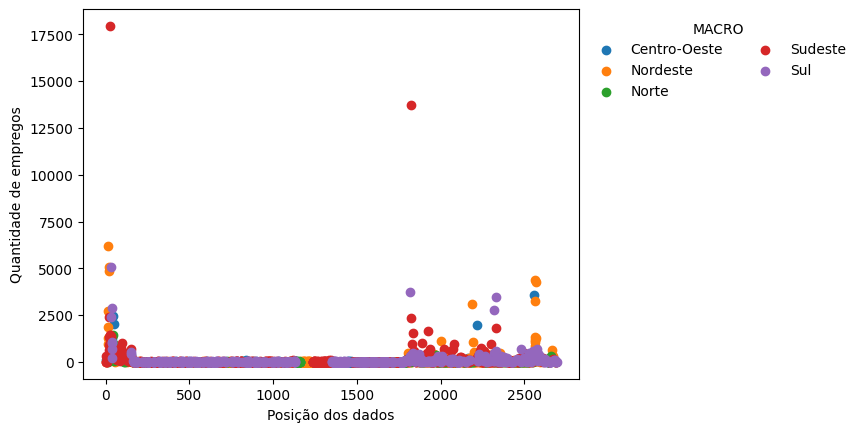

In [7]:
# outliers da tabela quantidade empregos filtrado pela região
grouped = dados_turismo.groupby('MACRO')['QUANTIDADE_EMPREGOS']
for name, group in grouped:
    plt.scatter(group.index, group, label=name)

plt.xlabel('Posição dos dados')
plt.ylabel('Quantidade de empregos')
plt.legend(title="MACRO", loc="upper left", bbox_to_anchor=(1,1), ncol=2, frameon=False)
plt.show()

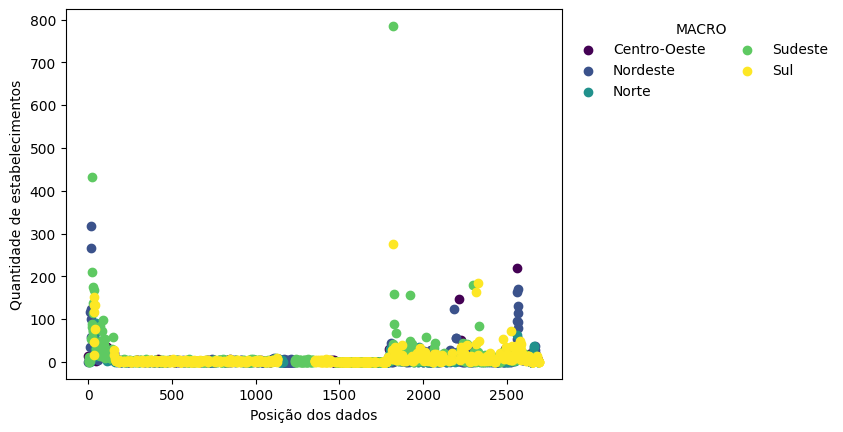

In [8]:
# outliers da tabela quantidade de estabelecimentos filtrado pela região
grouped = dados_turismo.groupby('MACRO')['QUANTIDADE_ESTABELECIMENTOS']
colors = plt.get_cmap("viridis")(np.linspace(0, 1, len(grouped)))

for i, (name, group) in enumerate(grouped):
    plt.scatter(group.index, group, label=name, color=colors[i])

plt.xlabel('Posição dos dados')
plt.ylabel('Quantidade de estabelecimentos')
plt.legend(title="MACRO", loc="upper left", bbox_to_anchor=(1,1), ncol=2, frameon=False)
plt.show()

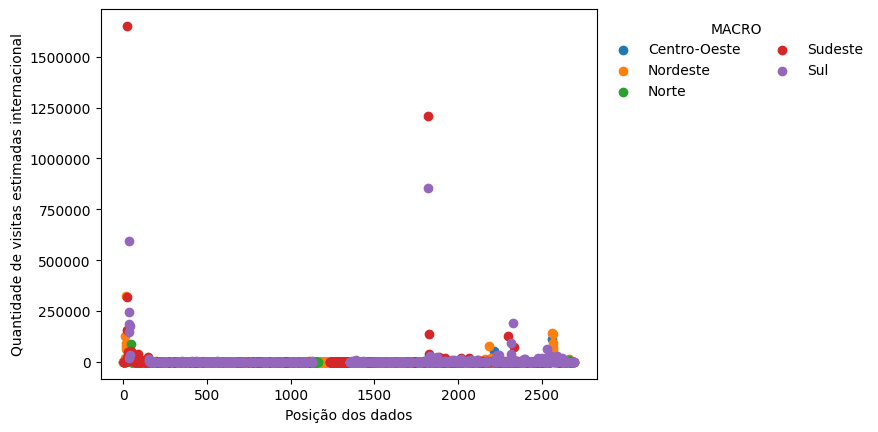

In [9]:
# outliers da tabela quantidade empregos filtrado pela região
grouped = dados_turismo.groupby('MACRO')['QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL']
for name, group in grouped:
    plt.scatter(group.index, group, label=name)

plt.xlabel('Posição dos dados')
plt.ylabel('Quantidade de visitas estimadas internacional')
plt.legend(title="MACRO", loc="upper left", bbox_to_anchor=(1,1), ncol=2, frameon=False)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

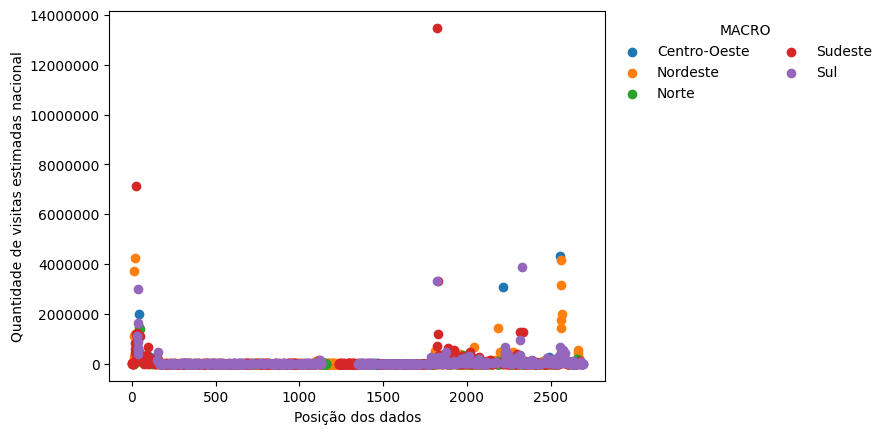

In [10]:
# outliers da tabela quantidade empregos filtrado pela região
grouped = dados_turismo.groupby('MACRO')['QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL']
for name, group in grouped:
    plt.scatter(group.index, group, label=name)

plt.xlabel('Posição dos dados')
plt.ylabel('Quantidade de visitas estimadas nacional')
plt.legend(title="MACRO", loc="upper left", bbox_to_anchor=(1,1), ncol=2, frameon=False)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

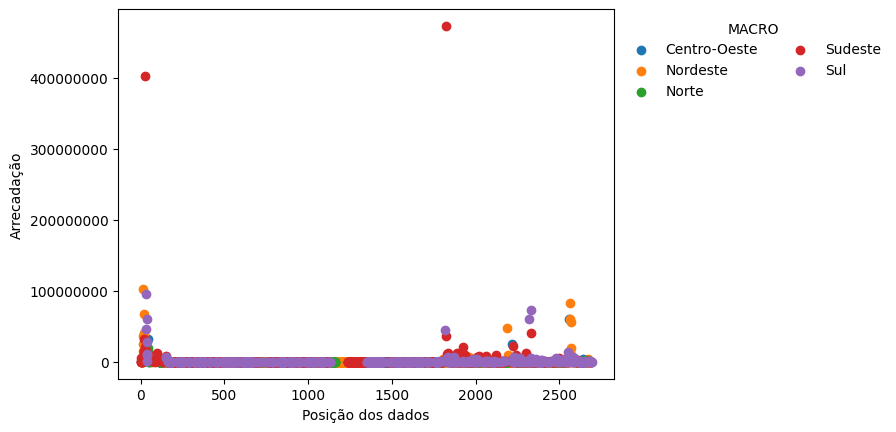

In [13]:
# outliers da tabela quantidade empregos filtrado pela região
grouped = dados_turismo.groupby('MACRO')['ARRECADACAO']
for name, group in grouped:
    plt.scatter(group.index, group, label=name)

plt.xlabel('Posição dos dados')
plt.ylabel('Arrecadação')
plt.legend(title="MACRO", loc="upper left", bbox_to_anchor=(1,1), ncol=2, frameon=False)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

## 1.3 - Tratamento em formato de dados

In [14]:
# Transformando as colunas em dados inteiros
dados_turismo['ARRECADACAO'] = dados_turismo['ARRECADACAO'].astype('float64')
dados_turismo['QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL'] = dados_turismo['QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL'].astype('int')
dados_turismo['QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL'] = dados_turismo['QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL'].astype('int')
dados_turismo['QUANTIDADE_EMPREGOS'] = dados_turismo['QUANTIDADE_EMPREGOS'].astype('int')
dados_turismo['QUANTIDADE_ESTABELECIMENTOS'] = dados_turismo['QUANTIDADE_ESTABELECIMENTOS'].astype('int')

dados_turismo

,MACRO,UF,REGIAO_TURISTICA,MUNICIPIO,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL,ARRECADACAO,CLUSTER
0,Centro-Oeste,MT,Região Turística Portal do Agronegócio,Nova Mutum,5106224,89,14,0,15309,708887.0,C
1,Nordeste,MA,Polo Lagos e Campos Floridos,Cajapió,2102408,0,0,0,1376,0.0,D
2,Sudeste,MG,Caminhos da Mantiqueira,Brazópolis,3108909,6,3,0,25587,0.0,D
3,Sudeste,MG,Ouro,Caeté,3110004,310,11,0,23757,4944942.0,B
4,Sudeste,MG,Pedras Preciosas,Catuji,3115458,0,0,149,0,0.0,D
...,...,...,...,...,...,...,...,...,...,...,...
2689,Sudeste,MG,Serra do Cabral,Lassance,3138104,0,0,0,0,0.0,E
2690,Sul,PR,Vale do Ivaí,Bom Sucesso,4103206,0,0,0,0,0.0,E
2691,Sul,PR,Norte do Paraná,Centenário do Sul,4105102,0,0,0,0,0.0,E
2692,Sul,RS,Uva e Vinho,Santo Antônio do Palma,4317558,0,0,0,0,0.0,E


## 1.4 - Se vários datasets, identificar chaves primárias e realizar a junção (join)

In [15]:
# Foi utilizado apenas um dataset

## 1.5 - Criação de novos dados para facilitar a análise (feature engineering)

In [16]:
# Não foi necessario criar novos dados

# 2 - Realizar pelo menos 5 análises descritivas e gerar os respectivos gráficos

## Maiores e menores valores de cada coluna agrupado pela região

### 1. Quantidade empregos

In [17]:
dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_EMPREGOS.sort_values(ascending=False)

MACRO
Sudeste         108805
Nordeste         66494
Sul              48832
Centro-Oeste     18641
Norte             8795
Name: QUANTIDADE_EMPREGOS, dtype: int32

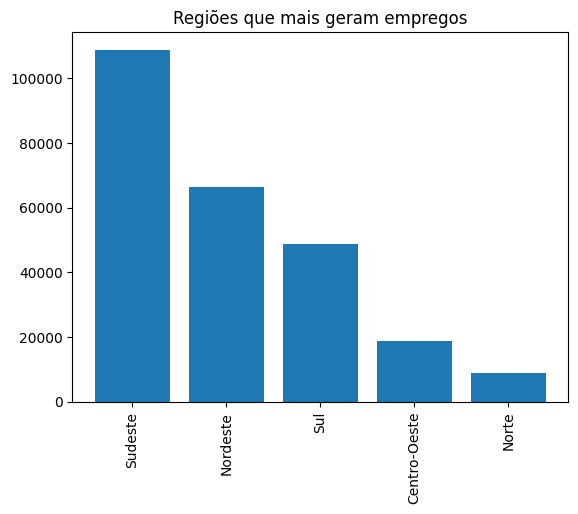

In [18]:
Qtd_Emprego_R = dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_EMPREGOS.sort_values(ascending=False)

plt.bar(Qtd_Emprego_R.index, Qtd_Emprego_R.values)
plt.title('Regiões que mais geram empregos')
plt.xticks(rotation=90)
plt.show()

### 2. Quantidade estabelecimentos

In [19]:
dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_ESTABELECIMENTOS.sort_values(ascending=False)

MACRO
Sudeste         8636
Nordeste        4624
Sul             4272
Centro-Oeste    1612
Norte           1105
Name: QUANTIDADE_ESTABELECIMENTOS, dtype: int32

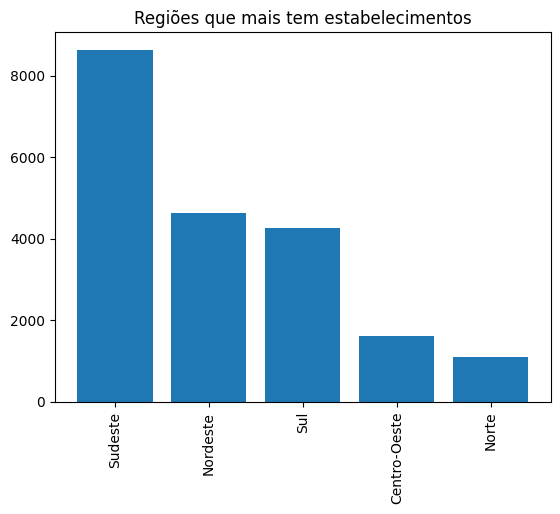

In [20]:
Qtd_Estabelecimentos_R = dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_ESTABELECIMENTOS.sort_values(ascending=False)

plt.bar(Qtd_Estabelecimentos_R.index, Qtd_Estabelecimentos_R.values)
plt.title('Regiões que mais tem estabelecimentos')
plt.xticks(rotation=90)
plt.show()

### 3. Quantidade de visitas estimadas internacional

In [21]:
dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL.sort_values(ascending=False)

MACRO
Sudeste         4723929
Sul             3488874
Nordeste        1684514
Centro-Oeste     261751
Norte            214229
Name: QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL, dtype: int32

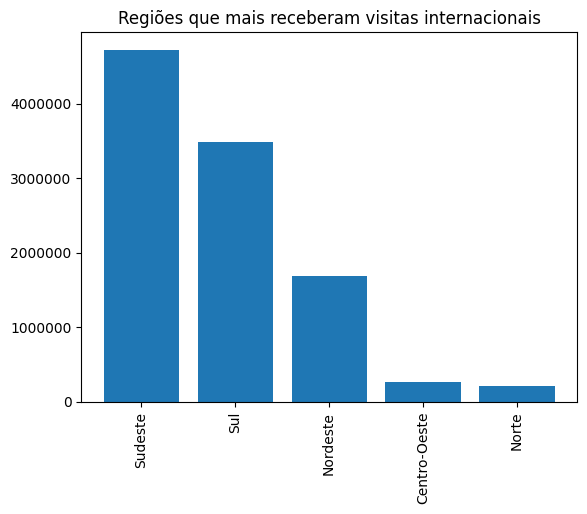

In [22]:
Qtd_Visitas_Internacional_R = dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL.sort_values(ascending=False)

plt.bar(Qtd_Visitas_Internacional_R.index, Qtd_Visitas_Internacional_R.values)
plt.title('Regiões que mais receberam visitas internacionais')
plt.xticks(rotation=90)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

### 4. Quantidade de visitas estimadas nacional

In [23]:
dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL.sort_values(ascending=False)

MACRO
Sudeste         65083213
Nordeste        45618492
Sul             36515602
Centro-Oeste    15490535
Norte            9265093
Name: QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL, dtype: int32

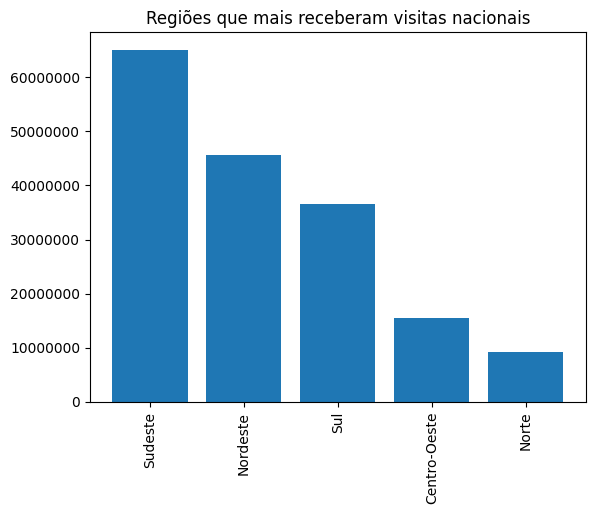

In [24]:
Qtd_Visitas_Nacional_R = dados_turismo.groupby('MACRO').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL.sort_values(ascending=False)

plt.bar(Qtd_Visitas_Nacional_R.index, Qtd_Visitas_Nacional_R.values)
plt.title('Regiões que mais receberam visitas nacionais')
plt.xticks(rotation=90)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

### 5. Quantidade arrecadação

In [25]:
dados_turismo.groupby('MACRO').sum(numeric_only=True).ARRECADACAO.sort_values(ascending=False)

MACRO
Sudeste         1.679759e+09
Nordeste        7.449397e+08
Sul             6.533241e+08
Centro-Oeste    1.867262e+08
Norte           7.074885e+07
Name: ARRECADACAO, dtype: float64

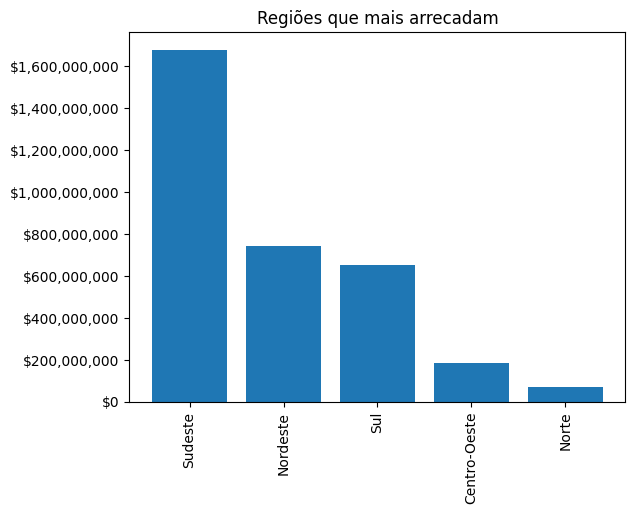

In [26]:
Qtd_Arrecadacao_R = dados_turismo.groupby('MACRO').sum(numeric_only=True).ARRECADACAO.sort_values(ascending=False)

plt.bar(Qtd_Arrecadacao_R.index, Qtd_Arrecadacao_R.values)
plt.title('Regiões que mais arrecadam')
plt.xticks(rotation=90)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

## Maiores e menores valores de cada coluna agrupado pelo estado

### 1. Quantidade empregos

In [192]:
dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_EMPREGOS.sort_values(ascending=False)

UF
SP    51500
RJ    33573
BA    25426
MG    20562
PR    15577
SC    15328
RS    14309
PE    11151
GO    10232
CE     8638
RN     6799
AL     5707
MT     4847
PA     3761
MS     3618
DF     3562
ES     3170
MA     2617
SE     2492
PB     2230
PI     1434
AM     1390
RO     1208
TO     1154
AC      604
AP      390
RR      288
Name: QUANTIDADE_EMPREGOS, dtype: int32

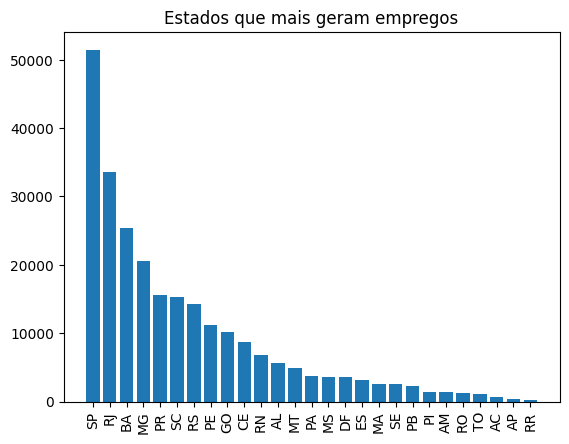

In [193]:
Qtd_Emprego = dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_EMPREGOS.sort_values(ascending=False)

plt.bar(Qtd_Emprego.index, Qtd_Emprego.values)
plt.title('Estados que mais geram empregos')
plt.xticks(rotation=90)
plt.show()

### 2. Quantidade estabelecimentos

In [194]:
dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_ESTABELECIMENTOS.sort_values(ascending=False)

UF
SP    4048
MG    2272
RJ    1927
BA    1696
RS    1350
SC    1307
PR    1182
GO     788
CE     716
PE     651
MT     604
RN     460
MS     433
PA     415
ES     389
AL     333
MA     261
DF     220
TO     198
PB     195
RO     183
SE     174
AM     145
PI     138
AC      67
AP      61
RR      36
Name: QUANTIDADE_ESTABELECIMENTOS, dtype: int32

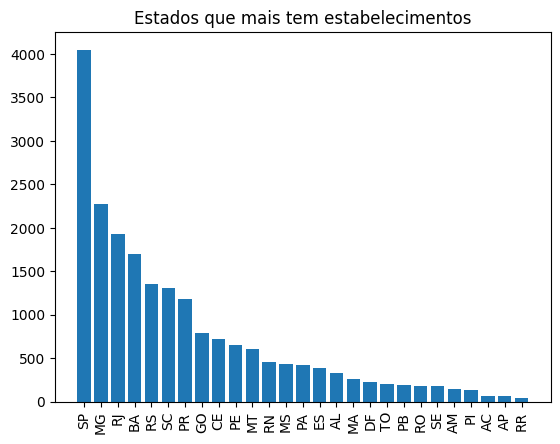

In [195]:
Qtd_Estabelecimentos = dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_ESTABELECIMENTOS.sort_values(ascending=False)

plt.bar(Qtd_Estabelecimentos.index, Qtd_Estabelecimentos.values)
plt.title('Estados que mais tem estabelecimentos')
plt.xticks(rotation=90)
plt.show()

### 3. Quantidade de visitas estimadas internacional

In [196]:
dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL.sort_values(ascending=False)

UF
RJ    2458004
SP    1842345
SC    1725946
PR     996513
RS     690425
BA     686746
MG     337053
CE     269515
PE     259195
RN     220721
DF     112474
GO     108864
AL     103034
AM      96490
ES      86527
MS      75990
PA      74049
MA      63656
PB      42178
MT      40413
PI      22148
SE      17321
TO      11324
RO      10591
RR       9669
AP       6772
AC       5334
Name: QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL, dtype: int32

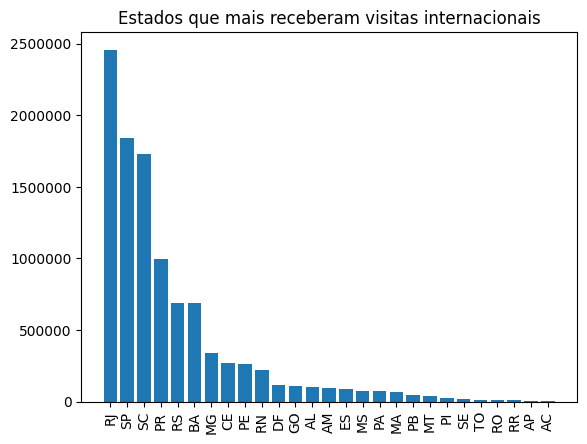

In [197]:
Qtd_Visitas_Internacional = dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL.sort_values(ascending=False)

plt.bar(Qtd_Visitas_Internacional.index, Qtd_Visitas_Internacional.values)
plt.title('Estados que mais receberam visitas internacionais')
plt.xticks(rotation=90)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

### 4. Quantidade de visitas estimadas nacional

In [198]:
dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL.sort_values(ascending=False)

UF
SP    35869364
RJ    15119284
RS    12288726
BA    11689373
SC    11006771
MG    10963129
PR    10766636
CE     8648825
GO     8302907
PE     8051747
RN     4636286
DF     4332053
PA     3612857
PB     3174130
ES     3131436
MT     2855575
MA     2784357
PI     2737344
MS     2453469
AL     2396924
AM     2181325
SE     1499506
TO     1265777
RO      794293
AC      592058
RR      589356
AP      229427
Name: QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL, dtype: int32

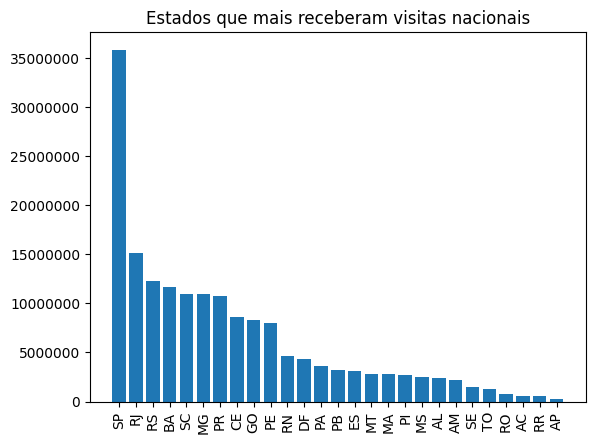

In [199]:
Qtd_Visitas_Nacional = dados_turismo.groupby('UF').sum(numeric_only=True).QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL.sort_values(ascending=False)

plt.bar(Qtd_Visitas_Nacional.index, Qtd_Visitas_Nacional.values)
plt.title('Estados que mais receberam visitas nacionais')
plt.xticks(rotation=90)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

### 5. Quantidade arrecadação

In [200]:
dados_turismo.groupby('UF').sum(numeric_only=True).ARRECADACAO.sort_values(ascending=False)

UF
SP    901974952.0
RJ    561335294.0
BA    266706735.0
PR    238037740.0
RS    201627693.0
MG    186019871.0
SC    184017563.0
PE    132596727.0
CE    117905001.0
GO     87841917.0
AL     80576205.0
RN     76311147.0
DF     59764674.0
MT     39119564.0
ES     30429109.0
MS     29641148.0
PA     27265262.0
PB     24318035.0
AM     20792927.0
MA     18860217.0
SE     15462589.0
PI     12203086.0
TO      8254585.0
RO      6779778.0
AC      3086344.0
RR      2432889.0
AP      2137068.0
Name: ARRECADACAO, dtype: float64

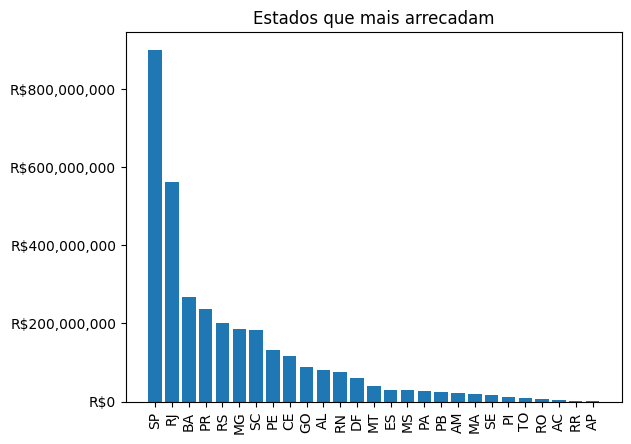

In [201]:
Qtd_Arrecadacao = dados_turismo.groupby('UF').sum(numeric_only=True).ARRECADACAO.sort_values(ascending=False)

plt.bar(Qtd_Arrecadacao.index, Qtd_Arrecadacao.values)
plt.title('Estados que mais arrecadam')
plt.xticks(rotation=90)
fmt = 'R${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

## Maiores e menores valores de cada coluna agrupado pelo Rio Grande do Norte

### 1. Quantidade empregos

In [202]:
#Criando um filtro para mostrar apenas os dados do RN
rn = dados_turismo[dados_turismo["UF"] == "RN"]
emprego_municipios = rn.groupby("MUNICIPIO")["QUANTIDADE_EMPREGOS"].sum().sort_values(ascending=False).head(40)

emprego_municipios

MUNICIPIO
Natal                    4379
Tibau do Sul             1043
Mossoró                   448
São Miguel do Gostoso     165
Parnamirim                 76
Canguaretama               58
Touros                     48
Maxaranguape               46
Baía Formosa               46
Açu                        45
Martins                    43
Caicó                      39
Currais Novos              36
Areia Branca               35
Rio do Fogo                31
Guamaré                    30
Santa Cruz                 28
Galinhos                   21
Baraúna                    20
Nísia Floresta             19
Pau dos Ferros             19
Monte das Gameleiras       17
Caraúbas                   17
Serra de São Bento         10
Macau                      10
Portalegre                 10
Ceará-Mirim                 9
Apodi                       8
Tibau                       7
Felipe Guerra               7
Parelhas                    5
Acari                       4
Extremoz                    4


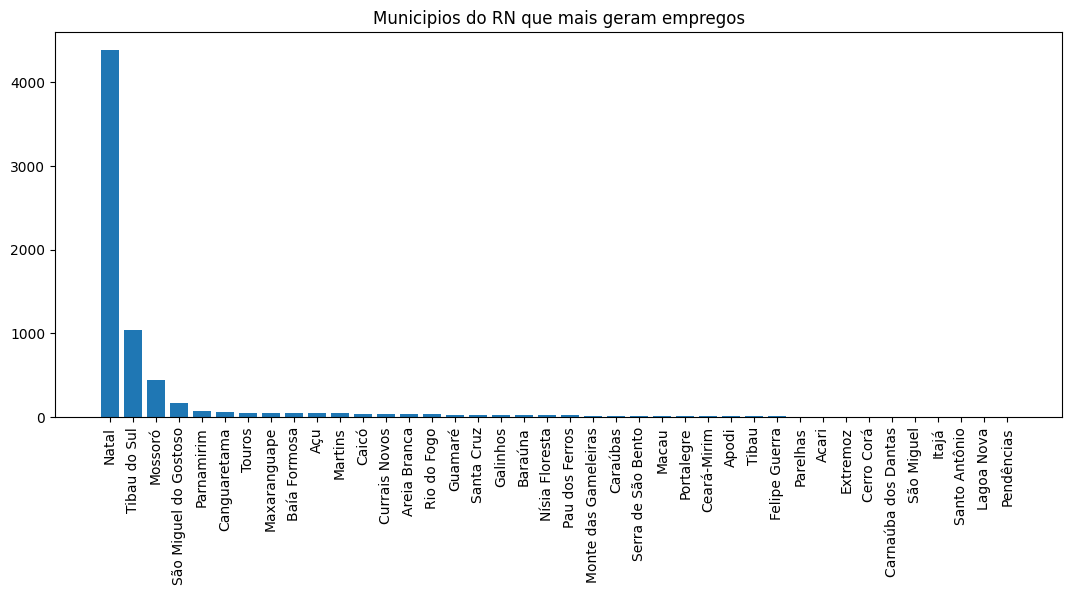

In [203]:
plt.figure(figsize=(13,5))
plt.bar(emprego_municipios.index, emprego_municipios.values)
plt.title('Municipios do RN que mais geram empregos')
plt.xticks(rotation=90)
plt.show()

### 2. Quantidade estabelecimentos

In [204]:
rn = dados_turismo[dados_turismo["UF"] == "RN"]
estabelecimento_municipios = rn.groupby("MUNICIPIO")["QUANTIDADE_ESTABELECIMENTOS"].sum().sort_values(ascending=False).head(40)

estabelecimento_municipios

MUNICIPIO
Natal                    170
Tibau do Sul              94
São Miguel do Gostoso     28
Mossoró                   23
Parnamirim                14
Açu                       10
Canguaretama              10
Baía Formosa               9
Caicó                      9
Touros                     7
Currais Novos              7
Areia Branca               6
Guamaré                    6
Santa Cruz                 6
Maxaranguape               5
Nísia Floresta             5
Pau dos Ferros             4
Galinhos                   4
Ceará-Mirim                4
Martins                    4
Rio do Fogo                3
Extremoz                   3
Macau                      3
Parelhas                   2
Serra de São Bento         2
São Miguel                 2
Tibau                      2
Acari                      2
Felipe Guerra              2
Caraúbas                   2
Apodi                      2
Baraúna                    2
Cerro Corá                 1
Monte das Gameleiras       1
Sant

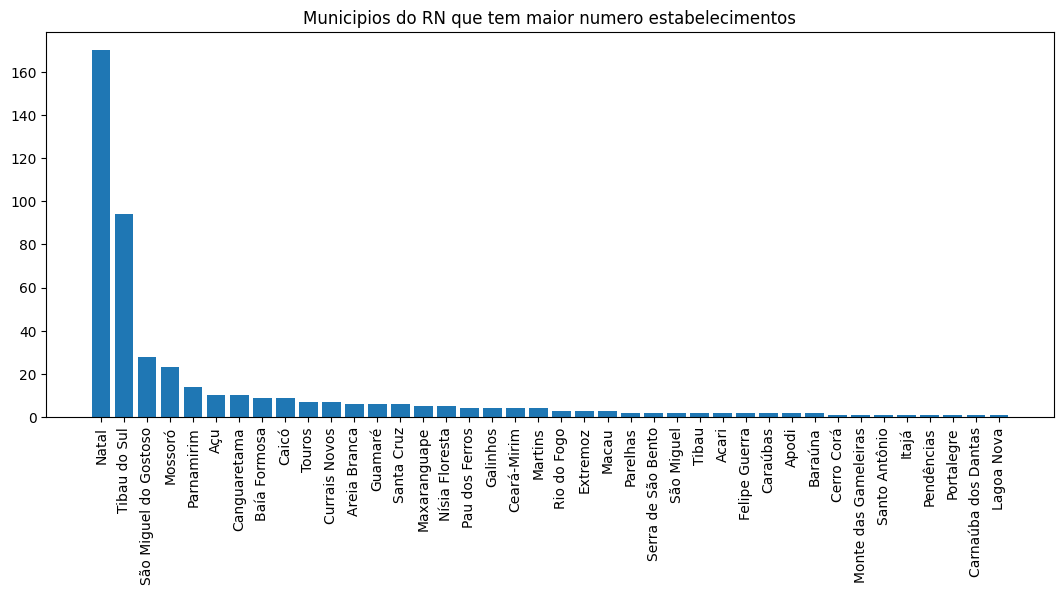

In [205]:
plt.figure(figsize=(13,5))
plt.bar(estabelecimento_municipios.index, estabelecimento_municipios.values)
plt.title('Municipios do RN que tem maior numero estabelecimentos')
plt.xticks(rotation=90)
plt.show()

### 3. Quantidade de visitas estimadas internacional

In [206]:
rn = dados_turismo[dados_turismo["UF"] == "RN"]
internacional_municipios = rn.groupby("MUNICIPIO")["QUANTIDADE_VISITAS_ESTIMADAS_INTERNACIONAL"].sum().sort_values(ascending=False).head(40)

internacional_municipios

MUNICIPIO
Natal                      138309
Tibau do Sul                72601
São Miguel do Gostoso        1828
Mossoró                      1708
Extremoz                      753
Tibau                         664
Baía Formosa                  533
Açu                           513
Areia Branca                  394
Galinhos                      387
São Miguel                    375
Maxaranguape                  327
Parnamirim                    303
Santa Cruz                    297
Caicó                         232
Macau                         223
Santo Antônio                 207
Currais Novos                 197
Parelhas                      190
Alexandria                    170
Touros                        136
Ceará-Mirim                   120
Baraúna                        66
Lucrécia                       64
Canguaretama                   64
Nísia Floresta                 60
Portalegre                      0
Riachuelo                       0
Rio do Fogo                     0
Serr

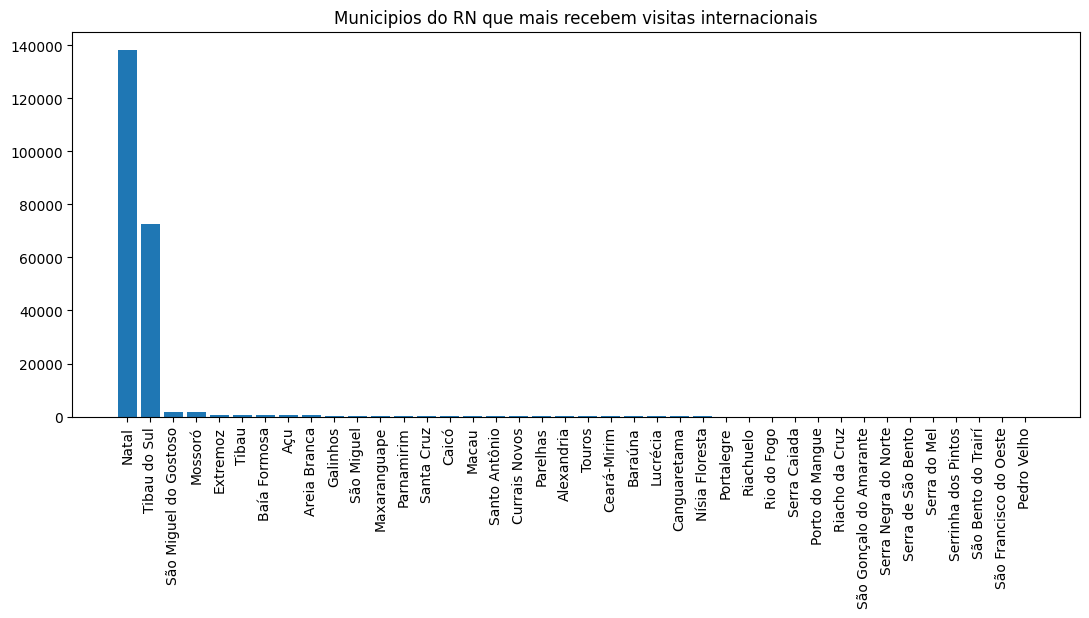

In [207]:
plt.figure(figsize=(13,5))
plt.bar(internacional_municipios.index, internacional_municipios.values)
plt.title('Municipios do RN que mais recebem visitas internacionais')
plt.xticks(rotation=90)
plt.show()

### 4. Quantidade de visitas estimadas nacional

In [208]:
rn = dados_turismo[dados_turismo["UF"] == "RN"]
nacional_municipios = rn.groupby("MUNICIPIO")["QUANTIDADE_VISITAS_ESTIMADAS_NACIONAL"].sum().sort_values(ascending=False).head(40)

nacional_municipios

MUNICIPIO
Natal                      3163130
Mossoró                     183638
Caicó                       162441
Tibau                       133494
Parnamirim                   84314
Baía Formosa                 74326
Santa Cruz                   67583
Apodi                        66870
Areia Branca                 53377
Caraúbas                     47316
Tibau do Sul                 46105
Pau dos Ferros               38758
Currais Novos                36274
Martins                      36119
Ceará-Mirim                  35618
Canguaretama                 34083
Touros                       31930
Guamaré                      29649
Baraúna                      29010
Florânia                     26807
Extremoz                     25072
Macau                        24953
Cerro Corá                   18306
Luís Gomes                   17085
Patu                         15852
Riachuelo                    15247
José da Penha                14505
São João do Sabugi           10601
São Gonçal

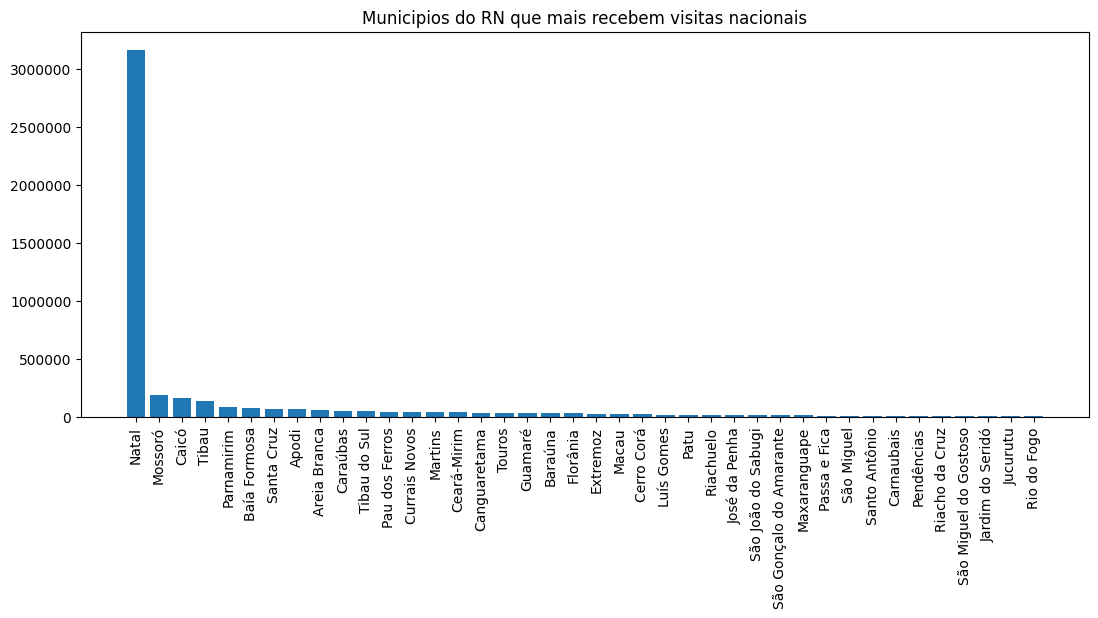

In [209]:
plt.figure(figsize=(13,5))
plt.bar(nacional_municipios.index, nacional_municipios.values)
plt.title('Municipios do RN que mais recebem visitas nacionais')
plt.xticks(rotation=90)
fmt = '{x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

### 5. Quantidade arrecadação

In [210]:
rn = dados_turismo[dados_turismo["UF"] == "RN"]
arrecadacao_municipios = rn.groupby("MUNICIPIO")["ARRECADACAO"].sum().sort_values(ascending=False).head(40)

arrecadacao_municipios

MUNICIPIO
Natal                      60338313.0
Tibau do Sul                9638275.0
Mossoró                     3698053.0
São Miguel do Gostoso       1056218.0
Parnamirim                   534516.0
Caicó                        287951.0
Baía Formosa                 276508.0
Canguaretama                 262354.0
Açu                          218959.0
Portalegre                        0.0
Santo Antônio                     0.0
Santa Cruz                        0.0
Rio do Fogo                       0.0
Riachuelo                         0.0
Riacho da Cruz                    0.0
Porto do Mangue                   0.0
Pedra Grande                      0.0
Pendências                        0.0
Pedro Velho                       0.0
Serra Negra do Norte              0.0
Pau dos Ferros                    0.0
Patu                              0.0
Passa e Fica                      0.0
Serra Caiada                      0.0
Serrinha dos Pintos               0.0
Serra de São Bento                0.0
Sí

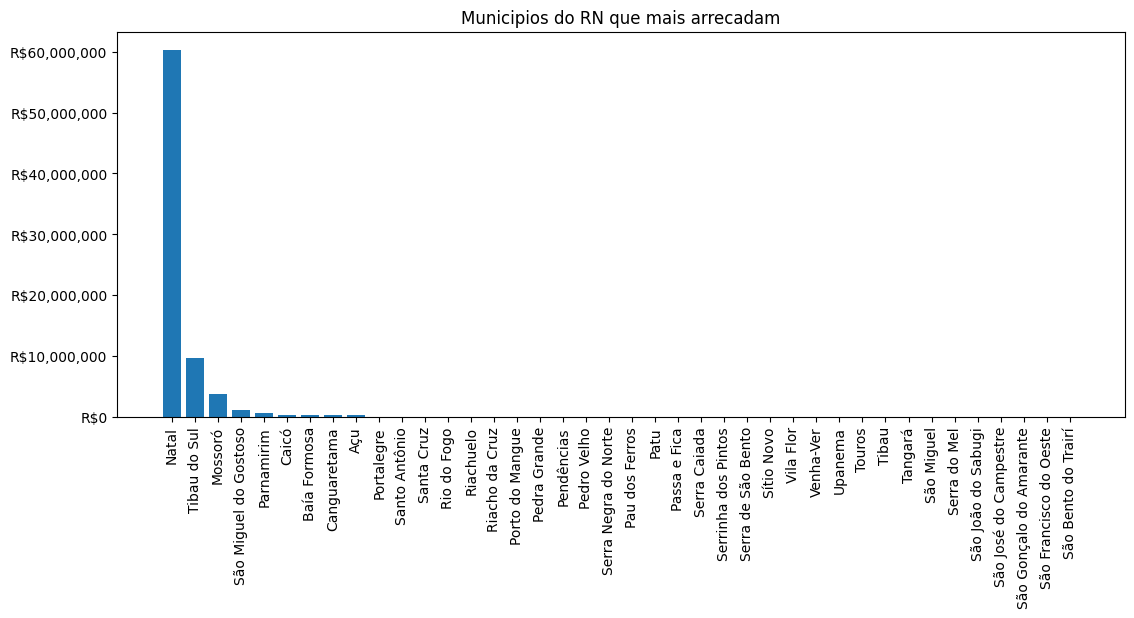

In [211]:
plt.figure(figsize=(13,5))
plt.bar(arrecadacao_municipios.index, arrecadacao_municipios.values)
plt.title('Municipios do RN que mais arrecadam')
plt.xticks(rotation=90)
fmt = 'R${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

## Analise de relação entre os dados no RN

#### Analise de correlação de Spearman

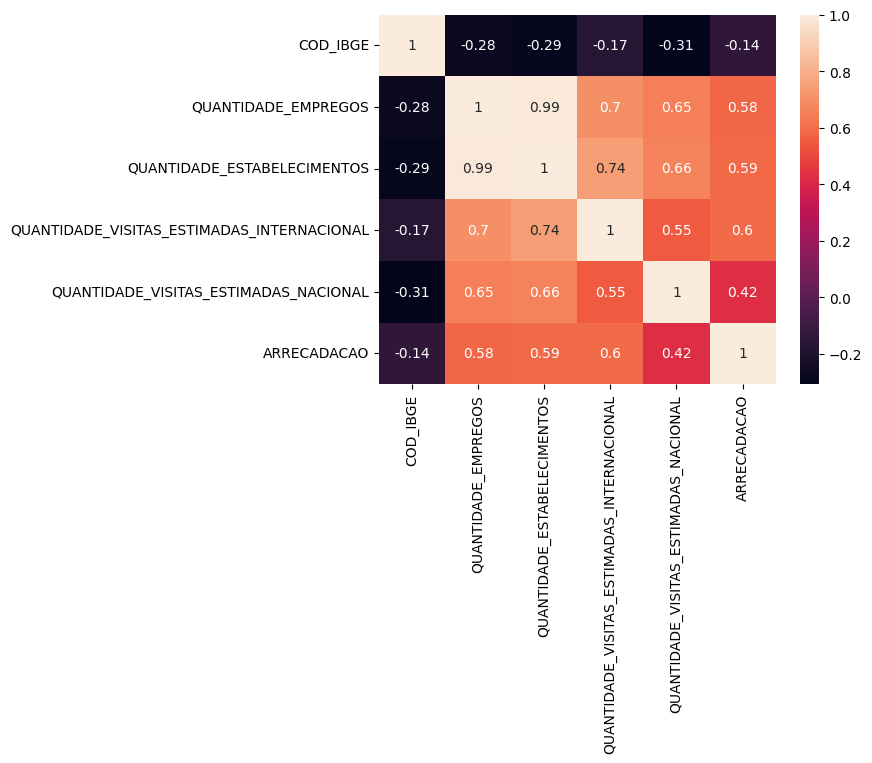

In [212]:
# Calcula a matriz de correlação de Spearman
corr = rn.corr(method='spearman', numeric_only = True)

# Cria o heatmap
sns.heatmap(corr, annot=True)

# Mostra o gráfico
plt.show()

#### Analise de correlação de Pearson

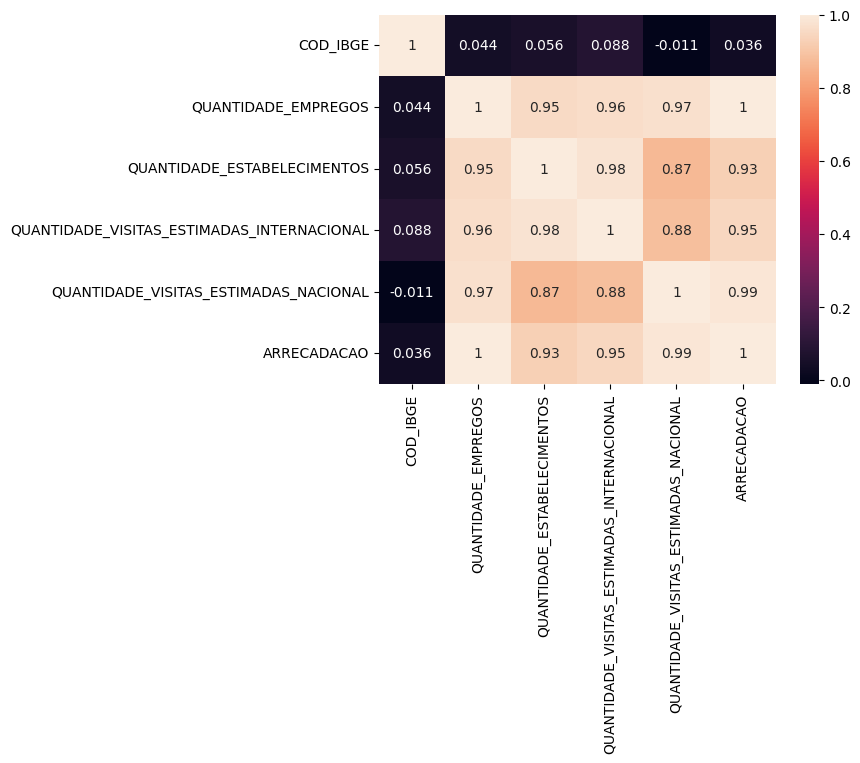

In [214]:
# Calcula a matriz de correlação de Pearson
corr = rn.corr(numeric_only=True)

# Cria o heatmap
sns.heatmap(corr, annot=True)

# Mostra o gráfico
plt.show()